---
# Documentation: https://wowchemy.com/docs/managing-content/

title: "Mengecek deflasi 5 bulan berturut-turut di Indonesia"
subtitle: ""
summary: ""
authors: [admin]
tags: [economics,deflasi]
categories: [economics,deflasi]
date: 2024-10-05T14:06:59+11:00
lastmod: 2024-10-05T14:06:59+11:00
featured: false
draft: false

# Featured image
# To use, add an image named `featured.jpg/png` to your page's folder.
# Focal points: Smart, Center, TopLeft, Top, TopRight, Left, Right, BottomLeft, Bottom, BottomRight.
image:
  caption: ""
  focal_point: ""
  preview_only: false

# Projects (optional).
#   Associate this post with one or more of your projects.
#   Simply enter your project's folder or file name without extension.
#   E.g. `projects = ["internal-project"]` references `content/project/deep-learning/index.md`.
#   Otherwise, set `projects = []`.
projects: []
---

di Indonesia belakangan ini sedang ramai tentang deflasi 5 bulan berturut-turut. Beberapa pihak seperti [INDEF](https://finance.detik.com/berita-ekonomi-bisnis/d-7573591/deflasi-5-bulan-berturut-bukti-kelas-menengah-tak-punya-uang) mengatakan bahwa ini merupakan hal yang menandakan daya beli kelas menengah yang berkurang. Tapi [Menteri Keuangan Sri Mulyani](https://money.kompas.com/read/2024/10/04/203606126/sri-mulyani-anggap-deflasi-5-bulan-berturut-turut-berdampak-positif?lgn_method=google&google_btn=onetap) merasa bahwa hal tersebut bukan menjadi permasalahan serius karena saat ini _core inflation_ (inflasi inti) _month-to-month_ masih tumbuh positif. Inflasi inti adalah inflasi yang tidak memperhitungkan harga bahan pangan dan energi, yang seringkali volatil.

Hal ini bisa kita cek dengan mudah. Saya menggunakan data [SEKI](https://www.bi.go.id/id/statistik/ekonomi-keuangan/seki/default.aspx#headingFour), persisnya tabel VIII.1, untuk ngecek pernyataan tersebut. Saya visualisasikan dengan seaborn tapi udah lama banget ga pegang python. Jaman sekarang lebih sering pake r, jadi maaf kalo kodingannya kurang rapih.

Oke pertama liat dulu inflasi secara umum. Biasanya, inflasi c-o-c bisa kita abaikan. m-o-m sih emang biasanya akan hover di bawah 1%, dan memang bisa kita lihat bahwa m-o-m di 5 bulan terakhir ada di teritori negatif. Secara y-o-y, Inflasi masih ada di daerah 2%, sesuai target BI. Tapi bisa kita lihat bahwa ada inflasi y-o-y yang relatif tinggi di sepanjang tahun 2022, yang kemudian mulai berkurang di 2023 sampai sekarang. Ada apaan tuh di 2022?

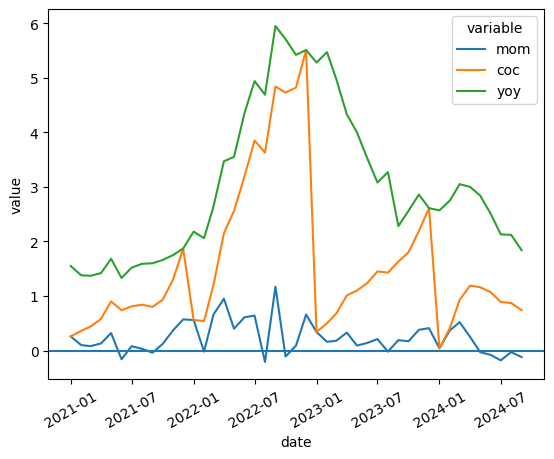

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
## Read data from the economist
url=f'https://docs.google.com/spreadsheets/d/1--ddaTIthvm3kQe97GTEqj1Rb1km0fwI/export?gid=1542512999#gid=1542512999&format=xlsx'
data=pd.read_excel(url,engine='openpyxl')
## Create the 'real' exchange rate measures
index=data.iloc[:,0:4]
index=pd.melt(index, id_vars='date').reset_index()
sns.lineplot(data=index,y='value',x='date',hue='variable')
plt.xticks(rotation=30)
plt.axhline(0)

2022 tuh adalah awal-awal mulainya perang Rusia-Ukraina. Ketika ini terjadi, 2 harga melonjak luar biasa: food and energy! Rusia si eksportir migas kelas kakap, serta Ukraina+Rusia yang merupakan eksportir bahan pangan (tepatnya gandum) dan pupuk. Jelas saja ini akan sangat mempengaruhi inflasi di Indonesia. Artinya, jangan-jangan SMI benar, bahwa deflasi sekarang lebih didorong oleh harga pangan dan energi yang mulai stabil?

Ngomong-ngomong, gambar di bawah ini saya ambil dari [excel database IMF Primary Commodity Prices](https://www.imf.org/en/Research/commodity-prices). Saya ambil commodity price index secara umum, food aja, dan energi aja. Semua dinormalize di Januari 2021. Sangat terlihat yah kenaikannya terutama di energi. Harga makanan juga bergejolak tapi enggak separah harga energi.

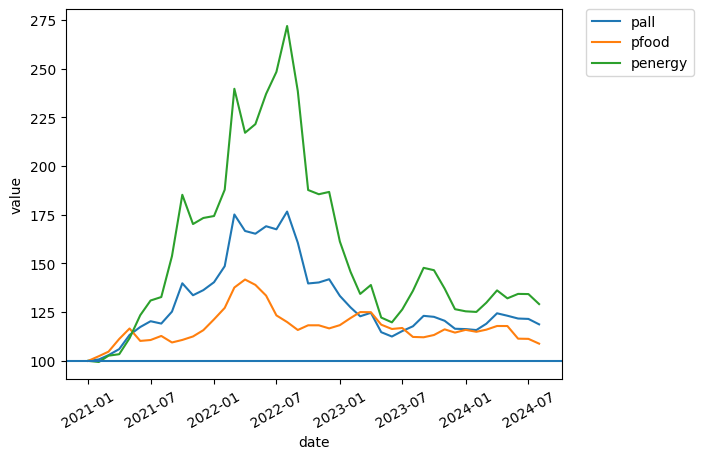

In [3]:
## Read data from the economist
url=f'https://docs.google.com/spreadsheets/d/1--ddaTIthvm3kQe97GTEqj1Rb1km0fwI/export?gid=1542512999#gid=1542512999&format=xlsx'
data=pd.read_excel(url,engine='openpyxl')
## Create the 'real' exchange rate measures
index=data[['date','pall','pfood','penergy']]
index=pd.melt(index, id_vars='date').reset_index()
sns.lineplot(data=index,y='value',x='date',hue='variable')
plt.axhline(100)
plt.xticks(rotation=30)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


Bagaimana dengan di Indonesia? Jika benar kata SMI, dan benar bahwa food dan energy adalah penyumbang utama inflasi di tahun sebelumnya (sehingga sekarang harusnya deflasi karena harga mulai normalisasi), maka kita akan melihat tren yang sama dengan harga pangan dan energi di Indonesia. Lagi-lagi saya akan pakai indeks harga yang dinormalisasi di Januari 2021 untuk menunjukkannya. Cuma problemnya di SEKI nih kayaknya di tahun 2024 kayaknya ada pergeseran tahun dasar, jadi agak susah bikin grafik yang menerus dari 2021 sampe sekarang. Terpaksa saya cut di 2024 Januari. Sayangnya di SEKI nggak dikasi tau secara eksplisit tentang pergeseran tahun dasar ini. 

Oke deh lanjut. Di bawah ini saya membedakan berbagai macam indeks harga sesuai dengan kelompok yang ada di SEKI. 

| variabel | artinya |
| --- | --- |
| food | MAKANAN, MINUMAN DAN TEMBAKAU |
| baju | PAKAIAN DAN ALAS KAKI |
| util | PERUMAHAN, AIR, LISTRIK, DAN BAHAN BAKAR RUMAH TANGGA |
| rt | PERLENGKAPAN, PERALATAN DAN PEMELIHARAAN RUTIN RUMAH TANGGA |
| sehat | KESEHATAN |
| trans | TRANSPORTASI |
| itfin | INFORMASI, KOMUNIKASI, DAN JASA KEUANGAN |
| rek | REKREASI, OLAHRAGA, DAN BUDAYA |
| pend | PENDIDIKAN |
| resto | PENYEDIAAN MAKANAN DAN MINUMAN/RESTORAN |
| dll | PERAWATAN PRIBADI DAN JASA LAINNYA |
| all | UMUM |



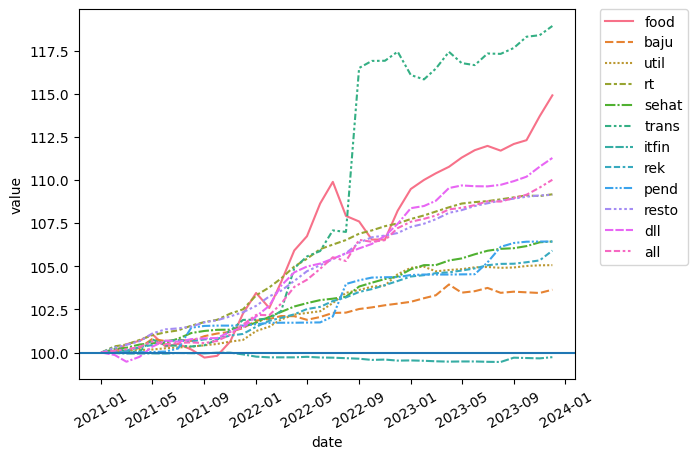

In [4]:
## Read data from the economist
url=f'https://docs.google.com/spreadsheets/d/1--ddaTIthvm3kQe97GTEqj1Rb1km0fwI/export?gid=1542512999#gid=1542512999&format=xlsx'
data=pd.read_excel(url,engine='openpyxl')
## Create the 'real' exchange rate measures
index=data[['date','food','baju','util','rt','sehat','trans','itfin','rek','pend','resto','dll','all']]
index=pd.melt(index, id_vars='date').reset_index()
sns.lineplot(data=index,y='value',x='date',hue='variable',style='variable')
plt.axhline(100)
plt.xticks(rotation=30)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


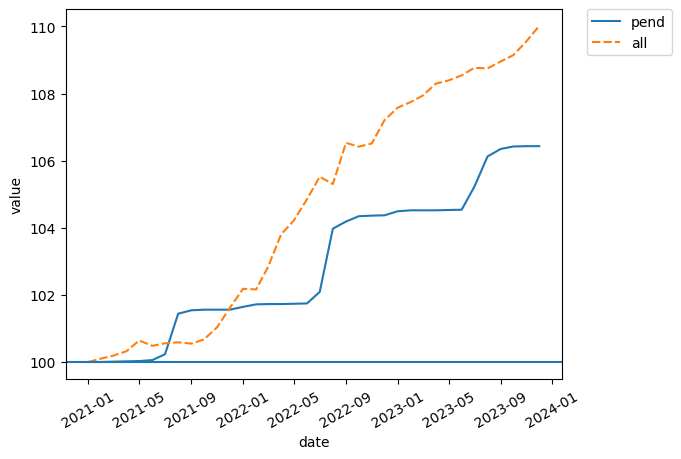

In [9]:
## Read data from the economist
url=f'https://docs.google.com/spreadsheets/d/1--ddaTIthvm3kQe97GTEqj1Rb1km0fwI/export?gid=1542512999#gid=1542512999&format=xlsx'
data=pd.read_excel(url,engine='openpyxl')
## Create the 'real' exchange rate measures
index=data[['date','pend','all']]
index=pd.melt(index, id_vars='date').reset_index()
sns.lineplot(data=index,y='value',x='date',hue='variable',style='variable')
plt.axhline(100)
plt.xticks(rotation=30)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


Kita bisa lihat sebelum 2024 tuh harga transportasi yang paling nyumbang ke inflasi. Di bulan juli tiba-tiba ada kenaikan indeks harga transportasi yang signifikan. Mungkin karena BBM ya. Tapi indeks harga pangan bener-bener melonjak di akhir 2021 dan sepanjang 2022. Inget ga waktu itu kita sampe ngalamin minyak goreng langka? Ga cuma minyak goreng yang naik tapi banyak harga pangan lainnya seiring dengan negara-negara pada ngeblokir ekspor bahan pangan secara umum. Yang menarik adalah harga-harga sektor teknologi informasi dan jasa finansial tuh udah lama deflasinya. Ada apaan ya? Indeksnya turun terus dari Januari 2021 kagak naik-naik. Sayangnya harga energi ga keliatan di sini, tapi kita bisa anggep naiknya indeks harga sektor transportasi sebagai proxy dari kenaikan harga energi, mengingat impor energi terbesar kita adalah BBM.

Oke lanjut ke tahun 2024.

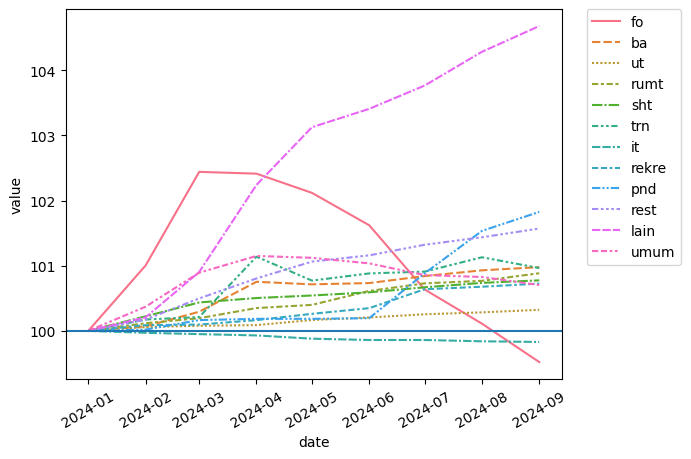

In [10]:
## Read data from the economist
url=f'https://docs.google.com/spreadsheets/d/1--ddaTIthvm3kQe97GTEqj1Rb1km0fwI/export?gid=1542512999#gid=1542512999&format=xlsx'
data=pd.read_excel(url,engine='openpyxl')
## Create the 'real' exchange rate measures
index=data[['date','fo','ba','ut','rumt','sht','trn','it','rekre','pnd','rest','lain','umum']]
index=pd.melt(index, id_vars='date').reset_index()
sns.lineplot(data=index,y='value',x='date',hue='variable',style='variable')
plt.axhline(100)
plt.xticks(rotation=30)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


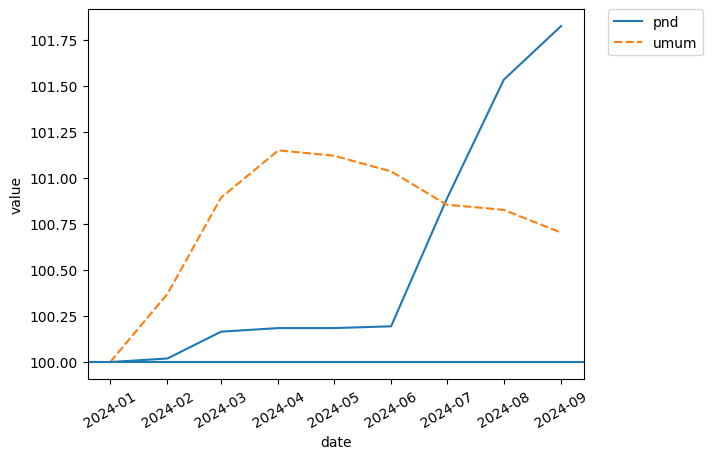

In [13]:
## Read data from the economist
url=f'https://docs.google.com/spreadsheets/d/1--ddaTIthvm3kQe97GTEqj1Rb1km0fwI/export?gid=1542512999#gid=1542512999&format=xlsx'
data=pd.read_excel(url,engine='openpyxl')
## Create the 'real' exchange rate measures
index=data[['date','pnd','umum']]
index=pd.melt(index, id_vars='date').reset_index()
sns.lineplot(data=index,y='value',x='date',hue='variable',style='variable')
plt.axhline(100)
plt.xticks(rotation=30)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


Nahhh beneran ternyata indeks harga pangan ini langsung drop signifikan sejak bulan maret, seiring dengan normalisasi harga komoditas pangan di pasar internasional. Bahkan, di bulan Agustus, harga pangan kembali ke level Januari 2021! Biasanya mamintem langganan jadi bagian terbesar keranjang belanja orang Indonesia secara umum. Jadinya kalau indeks harga mamintem ngedrop ya otomatis inflasi secara umum akan turun! Sepertinya transportasi juga sudah mulai stabil indeksnya, nggak turun sih, tapi juga nggak naik. Jangan-jangan SMI benar??

Pendidikan ni naik mendadak di Agustus kenapa ya? Ini yang rame Univ naikin uang semesteran itu bukan si? Dan IT & financial services melanjutkan tren penurunan harganya. Trus itu personal care dan jasa lainnya kok langsung naik signifikan gitu ya? Ada apaan ya?

Tapi tidak lengkap rasanya ngomongin inflasi dan daya beli tanpa melihat indeks harga perdagangan besar (IHPB) atau dalam bahasa enggresnya Wholesale Price Index (WPI). IHPB biasanya mencerminkan sisi produsen, dan seringkali lebih volatil daripada indeks harga konsumen. Saya ambil dari SEKI tabel VIII.2. Di situ juga ada indeks harga perdagangan internasional (IHPI) yang terdiri dari harga-harga wholesale impor dan ekspor. Cekidot!


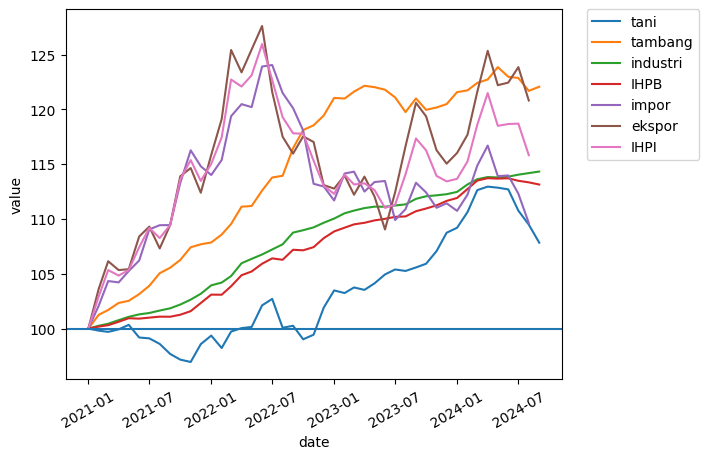

In [14]:
## Read data from the economist
url=f'https://docs.google.com/spreadsheets/d/1--ddaTIthvm3kQe97GTEqj1Rb1km0fwI/export?gid=1542512999#gid=1542512999&format=xlsx'
data=pd.read_excel(url,engine='openpyxl')
## Create the 'real' exchange rate measures
index=data[['date','tani','tambang','industri','IHPB','impor','ekspor','IHPI']]
index=pd.melt(index, id_vars='date').reset_index()
sns.lineplot(data=index,y='value',x='date',hue='variable')
plt.axhline(100)
plt.xticks(rotation=30)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


Mirip ya. Indeks harga perdagangan internasional mulai meningkat bahkan dari 2021 tapi memuncak di sekitar akhir 2021/awal 2022 sebelum mulai normalisasi. Belakangan ini indeks harga ekspor naik lebih tinggi dari indeks harga impor, menandakan impor yang murah relatif terhadap ekspornya. Biasanya ini hal bagus. Artinya, barang ekspor kita dihargai tinggi sementara barang impor dihargai murah. Dengan sedikit ekspor, kita bisa beli banyak impor! Tapi tentu saja drama impor China baru-baru ini seperti menunjukkan ke kita bahwa harga impor murah belum tentu bagus untuk semua orang.

Nah, harga produk-produk pertanian mengalami kenaikan sejak semester 2 2022. Tapi mulai akhir kuartal 1, produk pertanian mulai stagnan harganya dan bahkan menurun dari Juli. Hal ini sepertinya senada dengan menurunnya harga pangan. Tidak hanya impor pangan yang turun tapi juga harga lokal. Selain itu, IHPB tampak cukup stabil.

Nah, sepertinya bisa disimpulkan bahwa deflasi kita yang 5 bulan berturut-turut memang disumbangkan oleh sektor pangan. Mengingat harga pangan sempat naik pesat, sepertinya kita tidak perlu terlalu khawatir dengan deflasi ini, karena deflasi ini sepertinya menunjukkan harga pangan yang kembali ke level sebelum perang Ukraina-Rusia.

Harga sektor non-pangan masih tumbuh, yang sepertinya menunjukkan permintaan non-pangan masih baik. Sementara itu, Harga yang turun bisa didorong oleh permintaan lemah atau produksi yang meningkat. Sepertinya _shock_ penurunan produksi di tahun 2022 sudah mulai berkurang, sehingga _supply_ bisa kembali _shifting_ ke kanan. Artinya, bisa jadi sebenernya ini bukan sesuatu yang mengkhawatirkan.

Tapi, untuk mengkomplemen analisis ini, kita perlu nungguin PDB Indonesia kuartal 3 yang harusnya keluar sebentar lagi atau paling telat bulan depan. Abis itu baru bisa kita simpulkan dengan lebih yakin apakah deflasi ini normal atau alarming. Tapi yang jelas, saya gak setuju pernyataan [SMI tentang pengangguran yang pindah ke sektor ojol](https://tirto.id/srimul-11-juta-lapangan-kerja-tercipta-di-tengah-isu-banyak-phk-g4rv?utm_source=dlvr.it&utm_medium=twitter#google_vignette) karena pergeseran tenaga kerja dari formal ke informal bukan sesuatu yang kita inginkan. Juga soal [penurunan kelas menengah](https://open.spotify.com/episode/0NhTDAeIbTmlTdjyDcs7AV?si=163b2e76f3184dc2) yang menurut saya sesuatu yang sangat mengkhawatirkan. Tapi soal deflasi, sepertinya kita masih belum perlu terlalu khawatir.

Gimana menurutmu? Coba mensen saya di [twitter](https://twitter.com/imedkrisna). Kita diskusi lebih lanjut.

Anyway, data yang saya pake buat visualisasi ini bisa anda donlot di [sini](https://docs.google.com/spreadsheets/d/1--ddaTIthvm3kQe97GTEqj1Rb1km0fwI/edit?usp=sharing&ouid=104276702488037611353&rtpof=true&sd=true)